<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация </b></h1>

## Описание домашнего задания

Задание: предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет (я делал всё локально в vs code, по этому все файлики уже скачены)

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [305]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [306]:
data = pd.read_csv('data/game_of_thrones_train.csv',index_col='S.No')

In [252]:
data.sample(5) #5 рандомных строк из дата сета, чтобы понимать с чем имею дело

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
376,Brandon Stark (Burner),NaN,1,Northmen,NaN,NaN,Brandon Stark,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0,0,NaN,0,0.033445,1
1308,Renly Norcross,NaN,1,NaN,296.0,NaN,NaN,NaN,House Norcross,NaN,...,NaN,NaN,NaN,NaN,0,0,9.0,0,0.083612,1
383,Briar,NaN,0,Free Folk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033,1
273,Tanda Stokeworth,Stokeworth,0,NaN,NaN,NaN,NaN,NaN,House Stokeworth,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,1,0.113712,0
826,Orivel,Ser,1,NaN,NaN,NaN,NaN,NaN,Kingsguard,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.003344,1


In [253]:
#Посмторим типы данных и их количества
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Посмотрим на различную информацию фичей типа данных *object*, так же для удобства восприятия транспонируем таблицу

In [254]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Viserys II Targaryen,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Видим что у нас присутствуют пропуски, где-то порядка 50%, а где-то и все 90% +

Так же изучим фичи типа *float* и *int*


In [255]:
data.describe(include = ['float','int']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа.

**Задание 1.3.** Предобработка (очистка) данных.

Выведем количество пропусков по всем переменным 

In [256]:
data.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:




Можно заметить, что в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

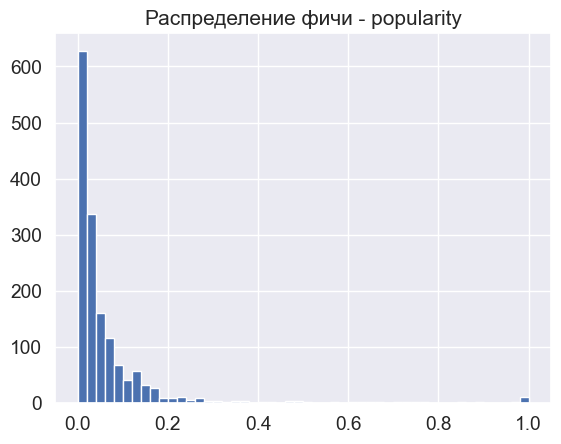

In [307]:
data['popularity'].hist(bins= 50)
plt.title('Распределение фичи - popularity')
plt.show()

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.


In [308]:
data['popularity'] = np.log10(data['popularity'] * 100 +1)

Text(0.5, 1.0, 'Распределение фичи - popularity после шкалирования')

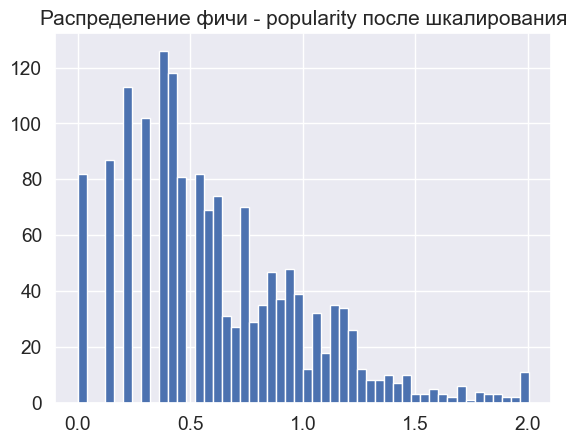

In [309]:
data['popularity'].hist(bins=50)
plt.title('Распределение фичи - popularity после шкалирования')


Теперь обработаем **признак numDeadRelations**.

Посмотрите на частотное распределение этого признака.

In [310]:
data['numDeadRelations'].unique()

array([11,  1,  0,  5,  3, 12, 10,  7,  4,  6, 15,  8,  2,  9])

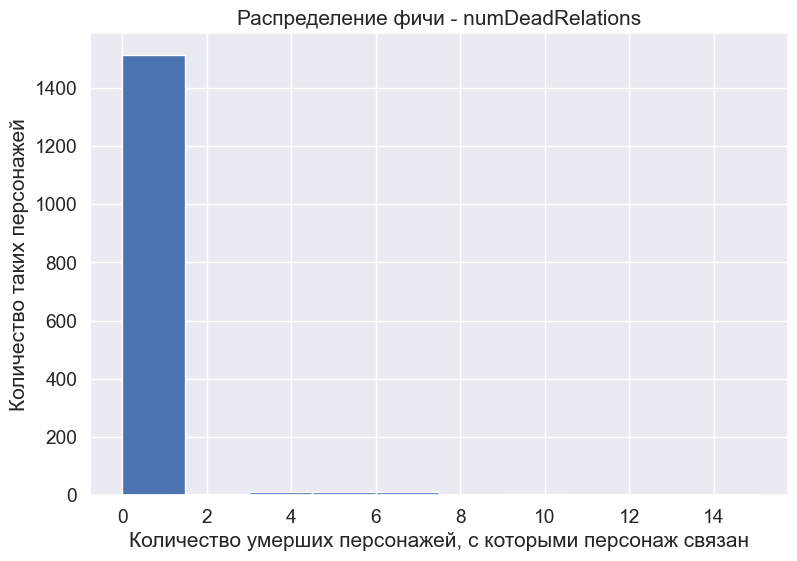

In [311]:
plt.figure(figsize=(9,6))
data['numDeadRelations'].hist()

plt.title('Распределение фичи - numDeadRelations')
plt.xlabel('Количество умерших персонажей, с которыми персонаж связан')
plt.ylabel('Количество таких персонажей')
plt.show()


Лишь для малого числа персонажей `numDeadRelations>0`.

Тепер создим признак `boolDeadRelations`. Упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

In [312]:
data['numDeadRelations'].value_counts()

numDeadRelations
0     1488
1       24
5       10
7        7
4        7
3        4
10       4
2        4
6        3
8        2
11       1
12       1
15       1
9        1
Name: count, dtype: int64

In [313]:
data.loc[(data['numDeadRelations']>0 ), ['numDeadRelations']] = 1 
data.rename(columns={'numDeadRelations':'boolDeadRelations'},inplace=True)

Наконец, поработаем с признаком ** age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [314]:
data['age_value'] = [0 if np.isnan(x) else x for x in data['age']]
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Посмотрим, какие значения принимает данный признак.

In [265]:
data['culture'].value_counts(dropna=False)

culture
NaN                        1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Dornish                      17
Dothraki                     17
Ghiscari                     17
Reach                        13
Vale mountain clans          12
Valemen                      10
Rivermen                     10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Summer Isles                  4
Stormlands                    4
Astapori                      4
Ironmen                       3
Dornishmen                    3
Northern mountain clans       3
Westermen                     3
Westeros                      3
Myrish                        2
Crannogmen                    2
Meereenese                    2
First Men                     2
westermen                     2


<Axes: >

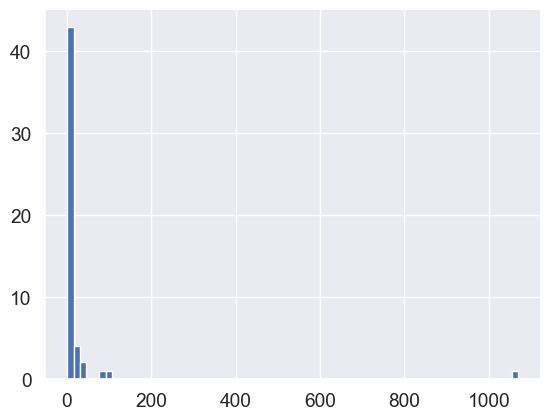

In [266]:
data['culture'].value_counts(dropna=False).hist(bins=70)

Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [81]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

Предложенный словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [315]:
cultures_grouped_inverted = {}
for k, vals in cultures_grouped.items():
    for val in vals:
        cultures_grouped_inverted[val] = k


Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента.

In [316]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

In [317]:
data['culture_grouped']

S.No
1                        NaN
2       the Isles and Rivers
3                        NaN
4                        NaN
5                      Dorne
                ...         
1553                     NaN
1554                     NaN
1555                     NaN
1556               the North
1557                     NaN
Name: culture_grouped, Length: 1557, dtype: object

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [318]:
data['culture_grouped'] = data['culture_grouped'].fillna('culture_no_data')

In [319]:
data['culture_grouped'].value_counts()

culture_grouped
culture_no_data              1069
Essos Nations                 109
the North                     108
the Iron Islands               95
Other Nations                  57
Old Nations                    32
the Mountain and the Vale      25
Dorne                          21
the Rock                       14
the Reach                      13
the Isles and Rivers           10
the Stormlands                  4
Name: count, dtype: int64

**Задание 1.6.** Категориальные признаки в линейных моделях

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Посмотреть количество уникальных значений для всех столбцов, воспользовавшись методом nunique() 

In [271]:
# Количество уникальнх значений в каждом столбце
data.nunique()

name                 1557
title                 195
male                    2
culture                51
dateOfBirth           105
mother                 16
father                 19
heir                   20
house                 315
spouse                186
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    72
boolDeadRelations       2
popularity            117
isAlive                 2
age_value              72
age_no_data             2
culture_grouped        12
dtype: int64

In [272]:
#объеденим описательную статистку и количество уникальных значений
data.describe(include = ['int','float']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.000000,2
dateOfBirth,279.0,-25.0,299.000000,105
book1,1557.0,0.0,1.000000,2
book2,1557.0,0.0,1.000000,2
book3,1557.0,0.0,1.000000,2
book4,1557.0,0.0,1.000000,2
book5,1557.0,0.0,1.000000,2
isAliveMother,18.0,0.0,1.000000,2
isAliveFather,22.0,0.0,1.000000,2
isAliveHeir,21.0,0.0,1.000000,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [320]:
# попробуем провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
name = 'isAliveSpouse'
data.groupby(name, dropna = False)['isAlive'].mean()


isAliveSpouse
0.0    0.619048
1.0    0.753165
NaN    0.786293
Name: isAlive, dtype: float64

Различия не такие уж сильные, возьмём это на заметку

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.

In [274]:
data.describe(include = ['int']).T

,count,mean,std,min,25%,50%,75%,max
male,1557.0,0.590880,0.491829,0.0,0.0,1.0,1.0,1.0
book1,1557.0,0.138728,0.345774,0.0,0.0,0.0,0.0,1.0
book2,1557.0,0.327553,0.469472,0.0,0.0,0.0,1.0,1.0
book3,1557.0,0.431599,0.495458,0.0,0.0,0.0,1.0,1.0
book4,1557.0,0.562620,0.496223,0.0,0.0,1.0,1.0,1.0
book5,1557.0,0.330122,0.470408,0.0,0.0,0.0,1.0,1.0
isMarried,1557.0,0.128452,0.334700,0.0,0.0,0.0,0.0,1.0
isNoble,1557.0,0.439306,0.496462,0.0,0.0,0.0,1.0,1.0
boolDeadRelations,1557.0,0.044316,0.205862,0.0,0.0,0.0,0.0,1.0
isAlive,1557.0,0.778420,0.415443,0.0,1.0,1.0,1.0,1.0


Для начал попробуем удалить признаки с большим количесвтом пропусков и посмотрим на качество предсказаний модели, если будет низкое вернёмся и будем обрабатывать фичи

In [321]:
df = data.drop(columns=['isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','age','dateOfBirth','mother','father','heir','spouse','name','culture'])

In [322]:
df.drop(columns=['title','house'],inplace=True)

Посмотрим, что получилось 

In [323]:
df.sample(5)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,popularity,isAlive,age_value,age_no_data,culture_grouped
S.No,,,,,,,,,,,,,,
414,1,0,0,0,1,0,0,1,0,0.565327,1,0.0,1,culture_no_data
1419,1,0,0,1,1,1,0,1,0,0.478089,1,0.0,1,culture_no_data
519,0,0,0,0,1,0,0,1,0,0.301756,1,0.0,1,culture_no_data
307,1,0,0,0,1,0,0,0,0,0.301756,1,0.0,1,the Iron Islands
465,0,0,0,1,0,0,0,0,0,0.000000,1,0.0,1,culture_no_data


In [278]:
df['culture_grouped'].describe()

count                1557
unique                 12
top       culture_no_data
freq                 1069
Name: culture_grouped, dtype: object

Кодирую culture_grouped с помощью target encoding

In [324]:
mean_target = df.groupby('culture_grouped')['isAlive'].mean() 

df['culture_target_enc'] = df['culture_grouped'].map(mean_target)
df.drop(columns=['culture_grouped'],inplace=True) #удаляю страую фичу

Итоговый датасет имеет вид:

In [325]:
df.sample(5)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,popularity,isAlive,age_value,age_no_data,culture_target_enc
S.No,,,,,,,,,,,,,,
585,0,0,1,0,0,0,0,0,0,0.426876,0,0.0,1,0.781104
1374,1,0,0,1,1,0,0,1,0,0.565327,1,0.0,1,0.781104
40,1,0,0,0,1,0,0,0,0,0.523894,1,0.0,1,0.834862
125,1,0,0,0,1,1,0,0,0,0.603148,1,0.0,1,0.777778
877,1,0,1,1,1,1,0,1,0,0.603148,1,0.0,1,1.000000


Проверим есть ли корреляция между признаками

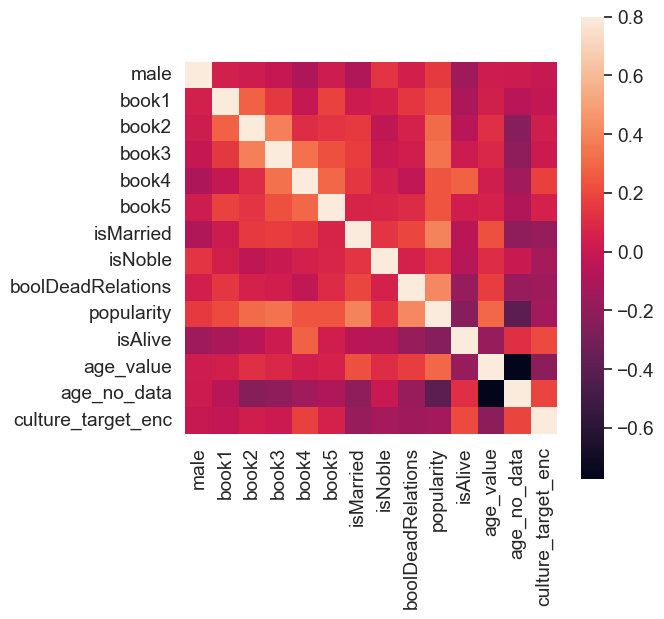

In [326]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

age_value и age_no_data сильно коррелируют, что в принипе логчино(в ходе эксперементов, удаление одного из признаков не улучило точность, по этому оставим оба признака)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [332]:
df['isAlive'].value_counts()


isAlive
1    1212
0     345
Name: count, dtype: int64

Присутсвует небольшой дизбаланс целевой переменной

Теперь проверим влияния пола персонажа

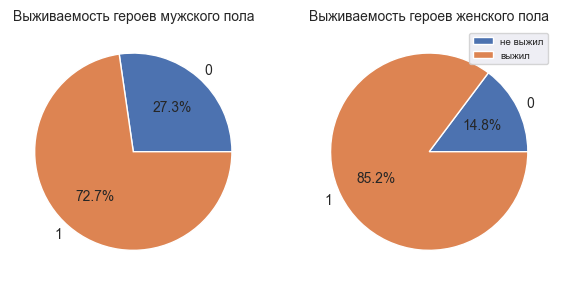

In [335]:
data_1 = df[df['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = df[df['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Выживаемость героев мужского пола', fontsize=10)
ax2.set_title('Выживаемость героев женского пола', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

Мужчина в среднем немного чаще умирают, что полностью логично учитываю, что в ИП было множество воин

Иследуем остальные бинарны признаки

 


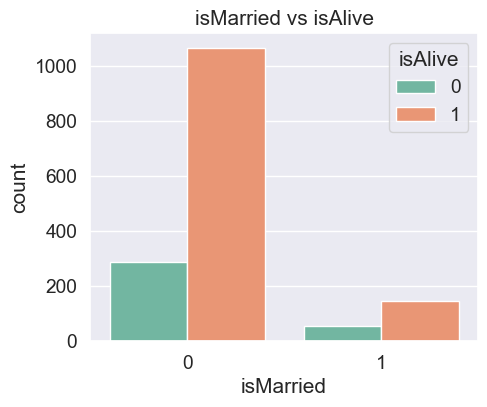

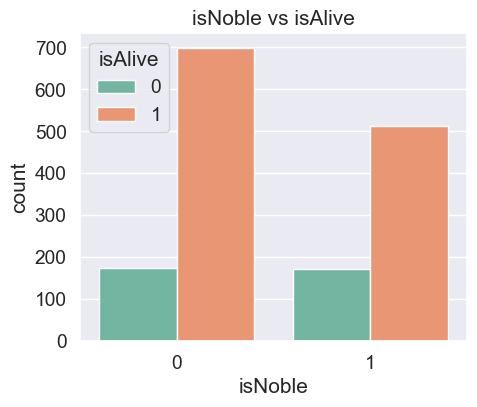

In [339]:
for col in ['isMarried','isNoble']:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, hue='isAlive', data=df, palette='Set2')
    plt.title(f'{col} vs isAlive')
    plt.show()

Теперь посмотрим на разлияия в разных книгах

/var/folders/gj/56f54n8n2sqbwjncq6lzjn_r0000gn/T/ipykernel_256/1958949532.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='book', y='present', hue='isAlive', data=df_books, ci=0)


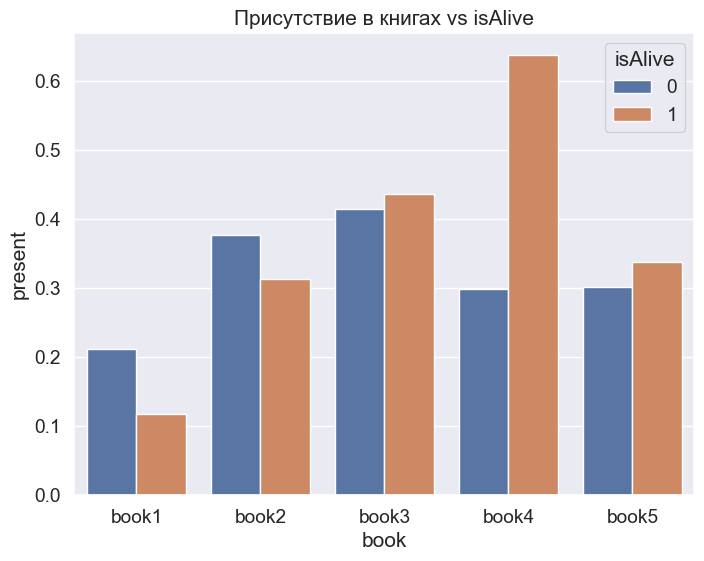

In [344]:
books = ['book1','book2','book3','book4','book5']

df_books = df[books + ['isAlive']].melt(id_vars='isAlive',
                                        var_name='book', 
                                        value_name='present')

plt.figure(figsize=(8,6))
sns.barplot(x='book', y='present', hue='isAlive', data=df_books, ci=0)
plt.title('Присутствие в книгах vs isAlive')
plt.show()


Так же воспользуемся случайным лесом, для анализа важности фичей

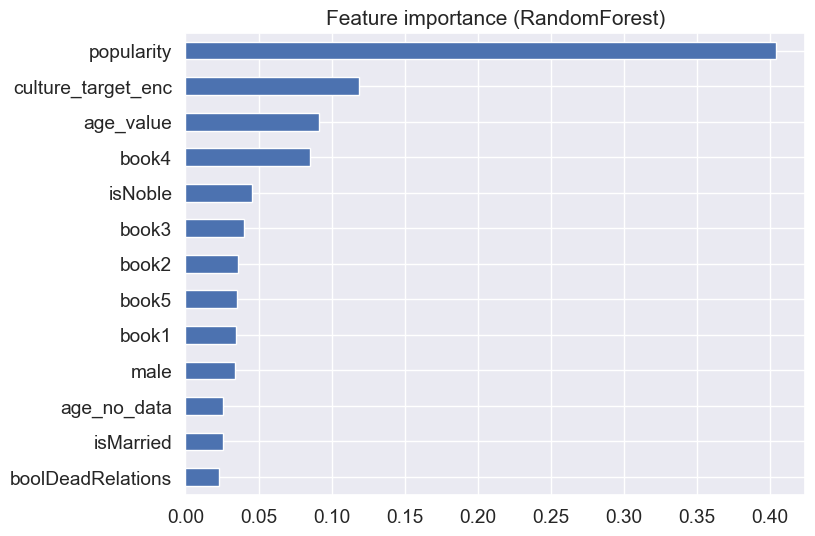

In [345]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['isAlive'])
y = df['isAlive']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature importance (RandomForest)')
plt.show()


Так как у нас нет, ограничений по памяти и скорости модели, то отсавим все фичи и проверим результат, позже возможно вернёмся

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [348]:
X = df.drop(columns=['isAlive'])
y = df['isAlive']

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [349]:
from sklearn.model_selection import train_test_split

In [350]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values,  test_size= 0.2, random_state= 42,shuffle=True )

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [286]:
from sklearn.linear_model import LogisticRegression

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [351]:
# Шаг 1. создание модели
model = LogisticRegression()

# Шаг 2. обучение модели
model.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_val)

In [ ]:
# Посмотрим на веса модели и на вклад всех фичей в предсказание
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coef': model.coef_[0]
}).sort_values(by='coef', ascending=False)

print(coef_df)

               feature      coef
4                book4  1.867338
12  culture_target_enc  1.675316
6            isMarried  0.445332
10           age_value -0.019645
3                book3 -0.087843
7              isNoble -0.098585
5                book5 -0.144919
2                book2 -0.216474
11         age_no_data -0.299207
8    boolDeadRelations -0.325610
1                book1 -0.349152
0                 male -0.514996
9           popularity -1.451996


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [180]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [289]:
data_test = pd.read_csv('data/game_of_thrones_test.csv',index_col='S.No')

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [ ]:
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


In [192]:
data_test.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
0,1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1,1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
2,1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
3,1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
4,1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [291]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
data_test.loc[1685, 'age'] = 0.

data_test.loc[1669, 'dateOfBirth'] = 299.
data_test.loc[1669, 'age'] = 0.

# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

Внесём все изменения в одну функцию

In [209]:
def preproc (data):
    data['popularity'] = np.log10(data['popularity'] * 100 +1)

    data.loc[(data['numDeadRelations']>0 ), ['numDeadRelations']] = 1 
    data.rename(columns={'numDeadRelations':'boolDeadRelations'},inplace=True)
    data['age_value'] = [0 if np.isnan(x) else x for x in data['age']]
    data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

    data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

    data['culture_grouped'] = data['culture_grouped'].fillna('culture_no_data')
    return data


In [292]:
df = preproc(data_test)
df.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,boolDeadRelations,popularity,age_value,age_no_data,culture_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,NaN,NaN,0,0,100.0,0,0.779360,100.0,0,culture_no_data
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,NaN,NaN,0,0,NaN,0,1.878418,0.0,1,Essos Nations
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,NaN,NaN,0,0,NaN,0,0.301756,0.0,1,culture_no_data
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,NaN,NaN,0,1,NaN,0,1.363115,0.0,1,culture_no_data
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,NaN,1.0,1,0,38.0,0,1.648148,38.0,0,the Isles and Rivers


Удаляем фичи, которые не использвали при обучении

In [ ]:
df.drop(columns=['isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','age','dateOfBirth','mother','father','heir','spouse','name','culture'],inplace=True)

df.drop(columns=['title','house'],inplace=True)


df['culture_target_enc'] = df['culture_grouped'].map(mean_target)
df.drop(columns=['culture_grouped'],inplace=True)
df.head(3)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,popularity,age_value,culture_target_enc
S.No,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,0,0.779360,100.0,0.781104
1559,0,0,1,1,1,1,0,0,0,1.878418,0.0,0.834862
1560,0,0,0,1,1,0,0,0,0,0.301756,0.0,0.781104


In [294]:
df.isna().sum()

male                  0
book1                 0
book2                 0
book3                 0
book4                 0
book5                 0
isMarried             0
isNoble               0
boolDeadRelations     0
popularity            0
age_value             0
culture_target_enc    0
dtype: int64

In [ ]:
preds = model.predict(df.values) #Делаем предсказание

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [353]:
submission = pd.read_csv('data/submission.csv', index_col='S.No') #Добавляет результаты предсказаний

In [297]:
submission['isAlive'] = preds
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


И сохраняем файл в формате csv:

In [298]:
submission.to_csv("new_submission.csv", index=False)

Точность получилось 0.69, что полностью покрывает оценку в 5 балов, поэтому к предыдушим шагам возврашаться не буду